# Cluster Comparison
C. Heiser, 2019

---
__The purpose of this notebook is to evaluate the effect of cluster annotation on our local and neighborhood structural preservation metrics. The *Samusik_01* dataset from the [UMAP _Nat. Biotech._ paper (Becht, _et al._ 2018)](https://www.nature.com/articles/nbt.4314) is used to evaluate previously annotated cluster IDs versus those generated locally by the Louvain algorithm__

In [1]:
import sys
sys.path.append('../')
from fcc_utils import *

In [20]:
# reload functions when editing file
del sys.modules['fcc_utils']
from fcc_utils import *

---
### Samusik_01 Hematopoeitic CyTOF Dataset
[FlowRepository FR-FCM-ZZPH](https://flowrepository.org/id/FR-FCM-ZZPH)

Read in partially-preprocessed data and perform __t-SNE__ and __UMAP__ reductions according to [Becht, _et al._ 2018](https://www.nature.com/articles/nbt.4314).

In [2]:
%time sam = sc.read('../inputs/samusik_01_.h5ad')

CPU times: user 1.27 s, sys: 105 ms, total: 1.37 s
Wall time: 1.44 s


In [3]:
%time sc.tl.umap(sam, random_state=18, min_dist=0.02)

CPU times: user 1min 24s, sys: 1.76 s, total: 1min 26s
Wall time: 57.7 s


In [4]:
%time sc.tl.tsne(sam, random_state=18, use_rep='X', perplexity=30, n_jobs=4)

CPU times: user 11min 51s, sys: 14.6 s, total: 12min 6s
Wall time: 12min 6s


In [5]:
vals = np.ascontiguousarray(sam.obs)
sam.obs = pd.DataFrame(vals.byteswap().newbyteorder(), index=sam.obs.index, columns=sam.obs.columns)

In [6]:
sam_labeled = sam[sam.obs['label'] != 0, :].copy()
sam_labeled

AnnData object with n_obs × n_vars = 53173 × 39 
    obs: 'Time', 'Cell_length', 'BC1', 'BC2', 'BC3', 'BC4', 'BC5', 'BC6', 'DNA1', 'DNA2', 'Cisplatin', 'beadDist', 'sample', 'event', 'label', 'name', 'louvain', 'louvain_label'
    uns: 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    layers: 'arcsinh_norm'

---
### Louvain Cluster IDs

In [7]:
%%time
find_centroids(sam_labeled, use_rep='X', obs_col='louvain')
find_centroids(sam_labeled, use_rep='X_pca', obs_col='louvain')
find_centroids(sam_labeled, use_rep='X_tsne', obs_col='louvain')
find_centroids(sam_labeled, use_rep='X_umap', obs_col='louvain')

CPU times: user 190 ms, sys: 1.51 ms, total: 191 ms
Wall time: 190 ms


11 permuted edges from native space.


/Users/cody/.virtualenvs/lau_lab/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


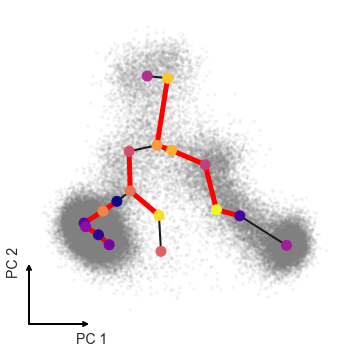

In [8]:
pca_set = set(sam_labeled.uns['X_pca_centroid_MST'].edges).difference(set(sam_labeled.uns['X_centroid_MST'].edges))
print('{} permuted edges from native space.'.format(len(pca_set)))
DR_plot(dim_name='PC', figsize=(5,5)).plot_centroids(adata=sam_labeled, obs_col='louvain', use_rep='X_pca', ctr_size=100, pt_size=10, draw_edges=True, highlight_edges=pca_set, save_to='outputs/plots/samusik_PCA_MST_louvain.png')

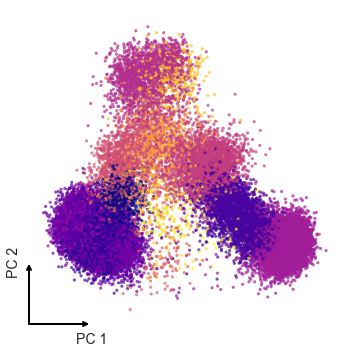

In [9]:
DR_plot(dim_name='PC').plot_IDs(sam_labeled, use_rep='X_pca', obs_col='louvain', pt_size=10)

13 permuted edges from native space.


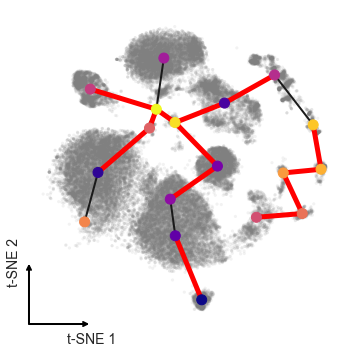

In [10]:
tsne_set = set(sam_labeled.uns['X_tsne_centroid_MST'].edges).difference(set(sam_labeled.uns['X_centroid_MST'].edges))
print('{} permuted edges from native space.'.format(len(tsne_set)))
DR_plot(dim_name='t-SNE', figsize=(5,5)).plot_centroids(adata=sam_labeled, obs_col='louvain', use_rep='X_tsne', ctr_size=100, pt_size=10, draw_edges=True, highlight_edges=tsne_set, save_to='outputs/plots/samusik_tSNE_MST_louvain.png')

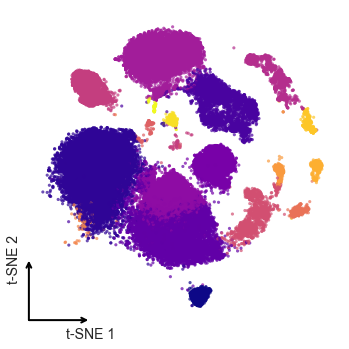

In [55]:
DR_plot(dim_name='t-SNE').plot_IDs(sam_labeled, use_rep='X_tsne', obs_col='louvain', pt_size=10, save_to='outputs/plots/samusik_tSNE_louvain.png')

11 permuted edges from native space.


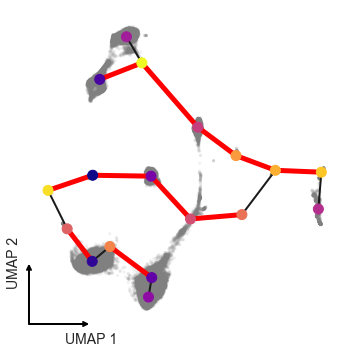

In [12]:
umap_set = set(sam_labeled.uns['X_umap_centroid_MST'].edges).difference(set(sam_labeled.uns['X_centroid_MST'].edges))
print('{} permuted edges from native space.'.format(len(umap_set)))
DR_plot(dim_name='UMAP', figsize=(5,5)).plot_centroids(adata=sam_labeled, obs_col='louvain', use_rep='X_umap', ctr_size=100, pt_size=10, draw_edges=True, highlight_edges=umap_set, save_to='outputs/plots/samusik_UMAP_MST_louvain.png')

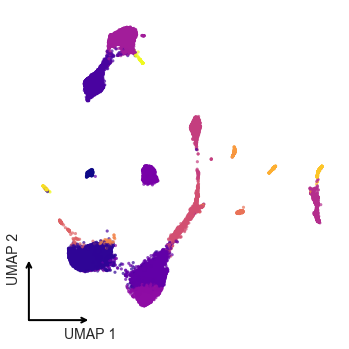

In [54]:
DR_plot(dim_name='UMAP').plot_IDs(sam_labeled, use_rep='X_umap', obs_col='louvain', pt_size=10, save_to='outputs/plots/samusik_UMAP_louvain.png')

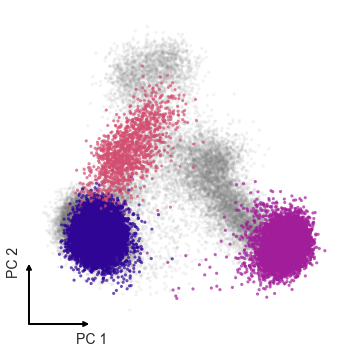

In [16]:
DR_plot(dim_name='PC').plot_IDs(sam_labeled, use_rep='X_pca', obs_col='louvain', pt_size=10, IDs=['0','2','7'])#, save_to='outputs/plots/samusik_tSNE_')

CPU times: user 1min 47s, sys: 11.7 s, total: 1min 58s
Wall time: 1min 56s


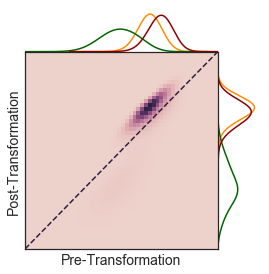

In [47]:
%time corr_pca_louvain, EMD_pca_louvain = cluster_arrangement_sc(sam_labeled, pre=sam_labeled.X, post=sam_labeled.obsm['X_pca'], obs_col='louvain', IDs=['0','2','7'], ID_names=['Classical Monocytes','IgD+ IgM+ B Cells','GMP'], figsize=(4,4), legend=False)

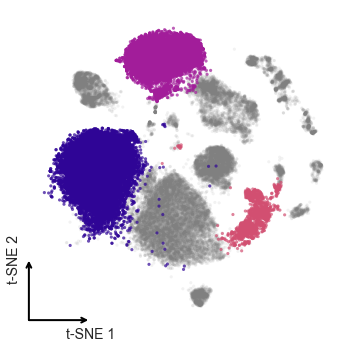

In [53]:
DR_plot(dim_name='t-SNE').plot_IDs(sam_labeled, use_rep='X_tsne', obs_col='louvain', pt_size=10, IDs=['0','2','7'], save_to='outputs/plots/samusik_tSNE_clusters_louvain.png')

CPU times: user 1min 46s, sys: 11.7 s, total: 1min 58s
Wall time: 1min 56s


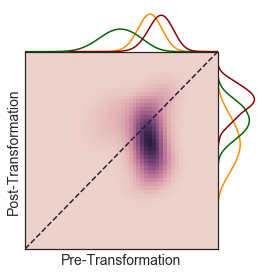

In [46]:
%time corr_tsne_louvain, EMD_tsne_louvain = cluster_arrangement_sc(sam_labeled, pre=sam_labeled.X, post=sam_labeled.obsm['X_tsne'], obs_col='louvain', IDs=['0','2','7'], ID_names=['Classical Monocytes','IgD+ IgM+ B Cells','GMP'], figsize=(4,4), legend=False)

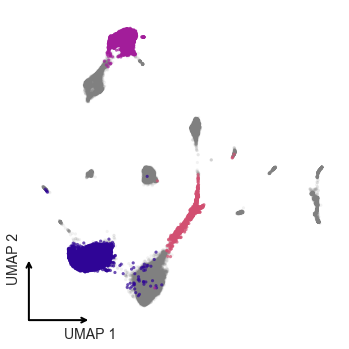

In [52]:
DR_plot(dim_name='UMAP').plot_IDs(sam_labeled, use_rep='X_umap', obs_col='louvain', pt_size=10, IDs=['0','2','7'], save_to='outputs/plots/samusik_UMAP_clusters_louvain.png')

CPU times: user 1min 45s, sys: 11.7 s, total: 1min 57s
Wall time: 1min 55s


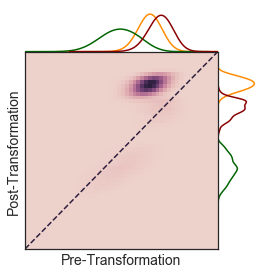

In [45]:
%time corr_umap_louvain, EMD_umap_louvain = cluster_arrangement_sc(sam_labeled, pre=sam_labeled.X, post=sam_labeled.obsm['X_umap'], obs_col='louvain', IDs=['0','2','7'], ID_names=['Classical Monocytes','IgD+ IgM+ B Cells','GMP'], figsize=(4,4), legend=False)

---
### Previously-Annotated Cluster IDs

In [24]:
%%time
find_centroids(sam_labeled, use_rep='X', obs_col='label')
find_centroids(sam_labeled, use_rep='X_pca', obs_col='label')
find_centroids(sam_labeled, use_rep='X_tsne', obs_col='label')
find_centroids(sam_labeled, use_rep='X_umap', obs_col='label')

CPU times: user 206 ms, sys: 2.46 ms, total: 208 ms
Wall time: 208 ms


11 permuted edges from native space.


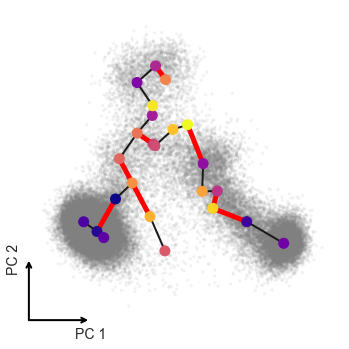

In [25]:
pca_set = set(sam_labeled.uns['X_pca_centroid_MST'].edges).difference(set(sam_labeled.uns['X_centroid_MST'].edges))
print('{} permuted edges from native space.'.format(len(pca_set)))
DR_plot(dim_name='PC', figsize=(5,5)).plot_centroids(adata=sam_labeled, obs_col='label', use_rep='X_pca', ctr_size=100, pt_size=10, draw_edges=True, highlight_edges=pca_set, save_to='outputs/plots/samusik_PCA_MST_label.png')

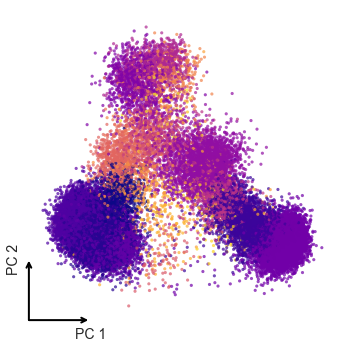

In [26]:
DR_plot(dim_name='PC').plot_IDs(sam_labeled, use_rep='X_pca', obs_col='label', pt_size=10)

12 permuted edges from native space.


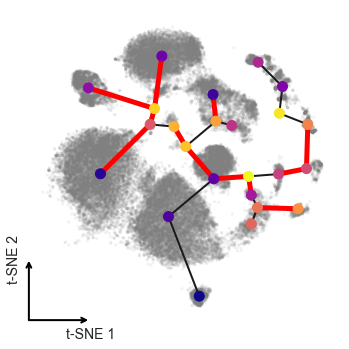

In [27]:
tsne_set = set(sam_labeled.uns['X_tsne_centroid_MST'].edges).difference(set(sam_labeled.uns['X_centroid_MST'].edges))
print('{} permuted edges from native space.'.format(len(tsne_set)))
DR_plot(dim_name='t-SNE', figsize=(5,5)).plot_centroids(adata=sam_labeled, obs_col='label', use_rep='X_tsne', ctr_size=100, pt_size=10, draw_edges=True, highlight_edges=tsne_set, save_to='outputs/plots/samusik_tSNE_MST_label.png')

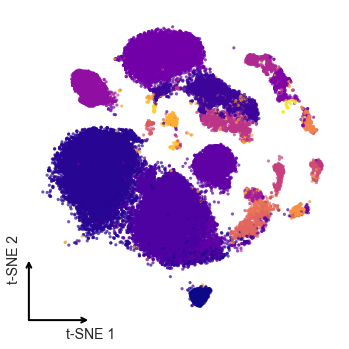

In [51]:
DR_plot(dim_name='t-SNE').plot_IDs(sam_labeled, use_rep='X_tsne', obs_col='label', pt_size=10, save_to='outputs/plots/samusik_tSNE_label.png')

12 permuted edges from native space.


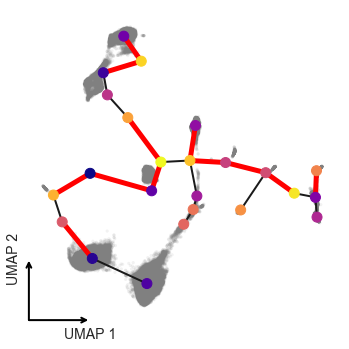

In [29]:
umap_set = set(sam_labeled.uns['X_umap_centroid_MST'].edges).difference(set(sam_labeled.uns['X_centroid_MST'].edges))
print('{} permuted edges from native space.'.format(len(umap_set)))
DR_plot(dim_name='UMAP', figsize=(5,5)).plot_centroids(adata=sam_labeled, obs_col='label', use_rep='X_umap', ctr_size=100, pt_size=10, draw_edges=True, highlight_edges=umap_set, save_to='outputs/plots/samusik_UMAP_MST_label.png')

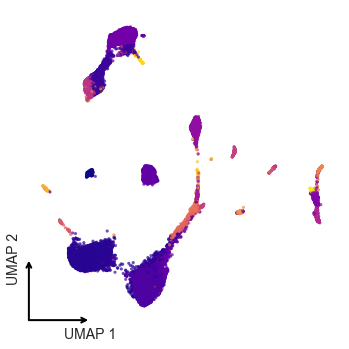

In [50]:
DR_plot(dim_name='UMAP').plot_IDs(sam_labeled, use_rep='X_umap', obs_col='label', pt_size=10, save_to='outputs/plots/samusik_UMAP_label.png')

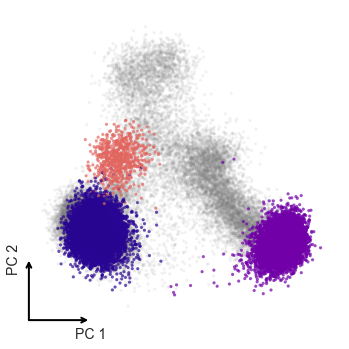

In [32]:
DR_plot(dim_name='PC').plot_IDs(sam_labeled, use_rep='X_pca', obs_col='label', pt_size=10, IDs=[5,13,10])#, save_to='outputs/plots/samusik_tSNE_')

CPU times: user 1min 36s, sys: 11.2 s, total: 1min 47s
Wall time: 1min 46s


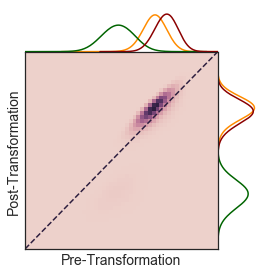

In [44]:
%time corr_pca_louvain, EMD_pca_louvain = cluster_arrangement_sc(sam_labeled, pre=sam_labeled.X, post=sam_labeled.obsm['X_pca'], obs_col='label', IDs=[5,13,10], ID_names=['Classical Monocytes','IgD+ IgM+ B Cells','GMP'], figsize=(4,4), legend=False)

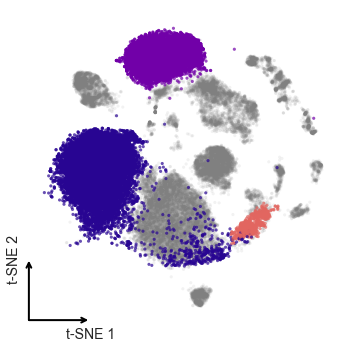

In [49]:
DR_plot(dim_name='t-SNE').plot_IDs(sam_labeled, use_rep='X_tsne', obs_col='label', pt_size=10, IDs=[5,13,10], save_to='outputs/plots/samusik_tSNE_clusters_label.png')

CPU times: user 1min 36s, sys: 11.1 s, total: 1min 47s
Wall time: 1min 45s


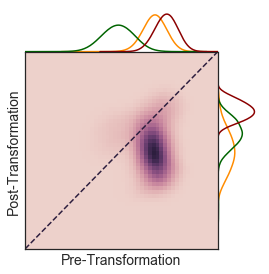

In [43]:
%time corr_tsne_louvain, EMD_tsne_louvain = cluster_arrangement_sc(sam_labeled, pre=sam_labeled.X, post=sam_labeled.obsm['X_tsne'], obs_col='label', IDs=[5,13,10], ID_names=['Classical Monocytes','IgD+ IgM+ B Cells','GMP'], figsize=(4,4), legend=False)

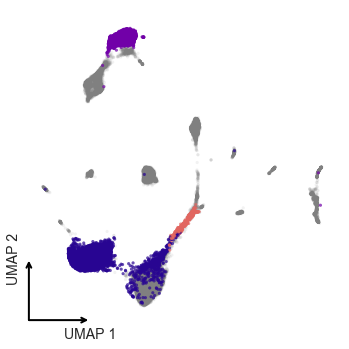

In [56]:
DR_plot(dim_name='UMAP').plot_IDs(sam_labeled, use_rep='X_umap', obs_col='label', pt_size=10, IDs=[5,13,10], save_to='outputs/plots/samusik_UMAP_clusters_label.png')

CPU times: user 1min 34s, sys: 11.1 s, total: 1min 46s
Wall time: 1min 44s


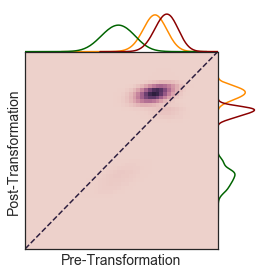

In [42]:
%time corr_umap_louvain, EMD_umap_louvain = cluster_arrangement_sc(sam_labeled, pre=sam_labeled.X, post=sam_labeled.obsm['X_umap'], obs_col='label', IDs=[5,13,10], ID_names=['Classical Monocytes','IgD+ IgM+ B Cells','GMP'], figsize=(4,4), legend=False)